## Final Project Submission

Please fill out:
* Student name: Leshmi Jayakumar
* Student pace: Part time 
* Scheduled project review date/time: 18/12/2022
* Instructor name: Hardik Idnani



# Introduction

Microsoft decided to invest in the film industry, and since Microsoft is keen on implementing its plans professionally, they have decided to employ a data scientist whose job is to explore the data of the movie industry, analyze it and set recommendations based on the outcomes of the analysis.

The following Questions were addressed:

1- Which studios had the maximum revenue in the domestic market?

2-Which genre had the maximum revenue in the domestic market?

3-Which release month gave the maximum profit?

4-Which genres had maximum genres around the world?

In [191]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from pandas.plotting import bootstrap_plot

In [7]:
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA

In [193]:

movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

CHEKING THE DATAS WHICH IS IMPORTED

In [9]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
title_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# DATA CLEANING 
-BY MERGING THE FILES
-SORTING
-GROUPING


In [12]:
title_gross_genre = movie_gross.merge(title_basics[['tconst','primary_title','genres']],left_on='title',
            right_on='primary_title',
            how='inner')
title_gross_genre

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,"Comedy,Romance"
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Documentary
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,"Action,Drama,Thriller"


In [17]:
movie_gross_genre_rating[['genres1','genres2','genres3']]  = movie_gross_genre_rating['genres'].str.split(',', expand=True)


In [27]:
movie_gross_genre_rating['domestic_gross_millions'] = movie_gross_genre_rating['domestic_gross']/1000000
movie_gross_genre_rating


,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,415.0000
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,292.6000
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",6.3,238.7000
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,300.5000
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",7.0,312.4000
...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,"Comedy,Romance",5.9,0.0114
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Documentary,NaN,0.0114
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,"Crime,Drama,Thriller",7.0,0.0089
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,"Action,Drama,Thriller",6.2,0.0062


In [29]:

#adding an additional columns to split the genre which is currently a string of genres to action,
#adventure, Animation, Biography, comedy etc. so I can get the box office revenue for each genre.
#https://datascienceparichay.com/article/pandas-split-column-by-delimiter/#:~:text=Split%20column%20by%20delimiter%20into,True%20to%20the%20expand%20parameter.

movie_gross_genre_rating[['genres1','genres2','genres3']]  = movie_gross_genre_rating['genres'].str.split(',', expand=True)

In [30]:
movie_gross_genre_rating

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions,genres1,genres2,genres3
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,415.0000,Adventure,Animation,Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,292.6000,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",6.3,238.7000,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,300.5000,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",7.0,312.4000,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,"Comedy,Romance",5.9,0.0114,Comedy,Romance,None
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Documentary,NaN,0.0114,Documentary,None,None
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,"Crime,Drama,Thriller",7.0,0.0089,Crime,Drama,Thriller
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,"Action,Drama,Thriller",6.2,0.0062,Action,Drama,Thriller


In [31]:
table = pd.pivot_table(movie_gross_genre_rating, values='domestic_gross_millions', index=[ 'genres'],columns=['year'], aggfunc=np.sum)
table.reset_index()
table

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
genres,,,,,,,,,
Action,NaN,1.3538,142.777,0.3010,134.9025,0.5693,27.771900,39.9760,0.1120
"Action,Adventure",NaN,NaN,0.271,0.0351,0.0132,0.0052,NaN,NaN,NaN
"Action,Adventure,Animation",273.3000,392.1000,103.400,187.2000,402.1000,8.9200,200.825400,1.9240,614.8910
"Action,Adventure,Biography",NaN,NaN,NaN,NaN,NaN,208.8290,NaN,NaN,31.4000
"Action,Adventure,Comedy",NaN,8.3000,103.900,33.9624,335.7181,310.0060,518.045799,1289.2630,573.2770
...,...,...,...,...,...,...,...,...,...
Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,2.325300,412.6968,0.0780
Sport,NaN,NaN,5.300,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,110.7415,44.7000,23.530,157.4830,130.7173,67.2802,45.143300,55.1060,0.0221


GETTING THE AVERAGE RATING

In [20]:
movie_gross_genre_rating = title_gross_genre.merge(title_rating[['tconst','averagerating']],
            left_on='tconst',
            right_on='tconst',
            how='left')
movie_gross_genre_rating

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,"Comedy,Romance",5.9
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Documentary,NaN
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,"Crime,Drama,Thriller",7.0
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,"Action,Drama,Thriller",6.2


# Data Analysis and Data Visualization


### 1.Genre With the Highest Domestic Gross

In [35]:
table1 = pd.pivot_table(movie_gross_genre_rating, values='domestic_gross_millions', index=[ 'genres1'],columns=['year'], aggfunc='sum')
table1.reset_index()
table1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
genres1,,,,,,,,,
Action,3397.549299,3591.1287,3755.897598,3984.523600,4671.867500,4235.799099,4664.626499,4957.865799,5179.8892
Adventure,1861.536000,1360.0646,1623.311800,2708.967899,1463.565500,1799.976899,2132.284399,1474.784800,1186.5495
Animation,251.500000,81.3550,184.986000,1.000000,233.271700,174.246900,274.673000,39.595800,54.9018
Biography,572.720000,292.5628,577.918100,606.110500,505.917200,1007.067199,695.323999,565.915400,683.2293
Comedy,1560.906000,2128.5284,1729.182300,1138.574498,1316.401900,1503.066400,1236.245000,748.266200,1604.0152
Crime,198.309000,72.3899,76.193400,479.411100,153.081900,639.280100,180.229200,327.623900,293.9771
Documentary,450.669100,492.6302,273.756898,158.967900,650.047100,722.422999,404.528999,538.340100,348.5945
Drama,1072.471600,1290.7749,1220.268699,1220.935600,1106.858199,1909.192999,1197.211200,1182.766600,973.5526
Family,2.042000,13.8000,9.200000,NaN,NaN,356.500000,NaN,1.655000,NaN


<AxesSubplot:title={'center':'Genre With the Highest Domestic Gross'}, xlabel='Genres', ylabel='Domestic Gross'>

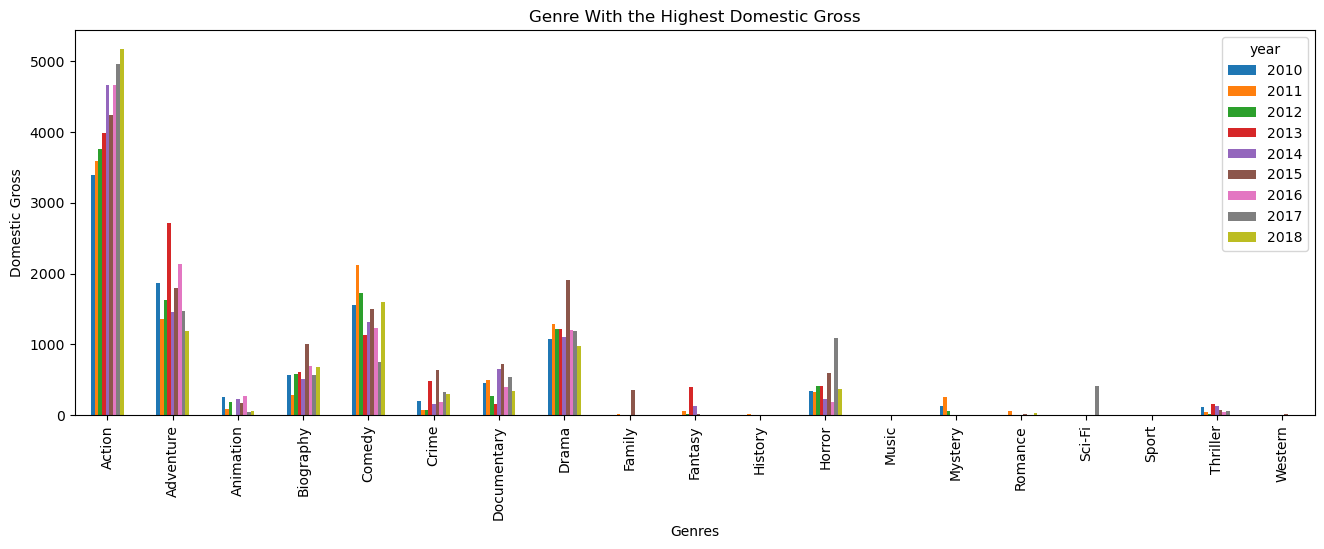

In [275]:
table1.plot(kind='bar', figsize=(16,5), xlabel='Genres', ylabel='Domestic Gross', title='Genre With the Highest Domestic Gross')


### Conclusion based on the genre and domestic gross


The above graph show that the  following genres are the genres which give more profit.

1.Action
2.Adventure
3.Comedy
4.Drama

### 2.Movie Studios With the Highest Domestic Gross

In [371]:
Total_of_each_studio = movie_gross_genre_rating.groupby([ 'year','studio'])['domestic_gross_millions'].sum()
sorted_Total_of_each_studio_filtered = sorted_Total_of_each_studio.loc[sorted_Total_of_each_studio['domestic_gross_millions'] > 800]
sorted_Total_of_each_studio_filtered.reset_index()


,index,year,studio,domestic_gross_millions
0,575,2018,BV,2946.400000
1,631,2018,WB,1566.200000
2,627,2018,Uni.,1359.122000
3,615,2018,Par.,1024.600000
4,632,2018,WB (NL),914.000000
5,507,2017,BV,2293.600000
6,558,2017,Uni.,2100.300000
7,562,2017,WB,2057.000000
8,525,2017,Fox,1153.600000
9,554,2017,Sony,997.275000


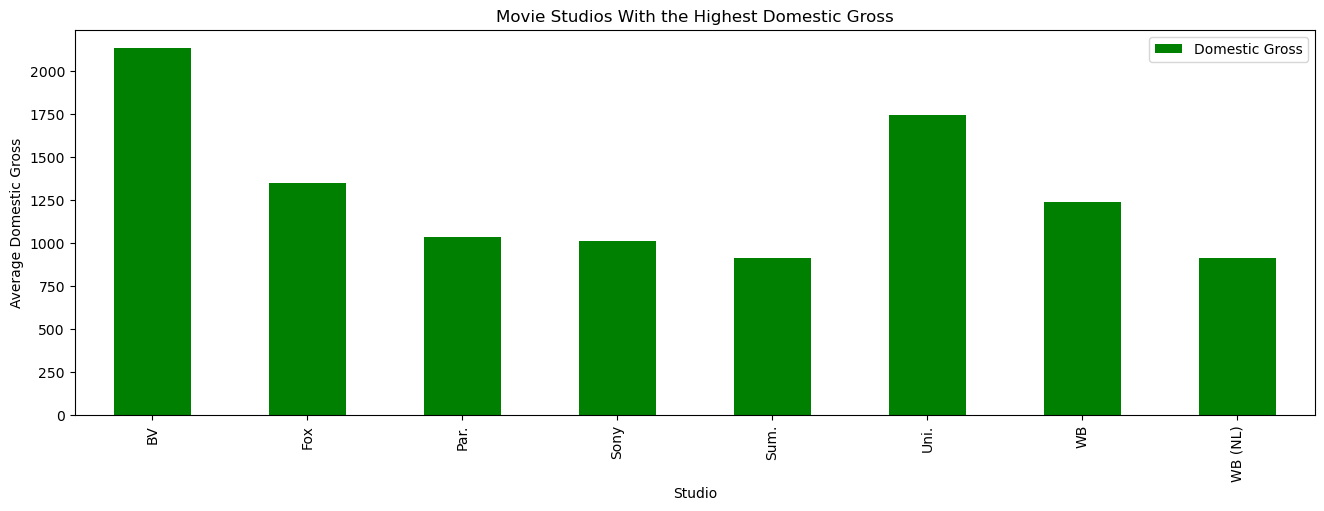

In [372]:
studio = sorted_Total_of_each_studio_filtered.sort_values('domestic_gross_millions', ascending=False)[:100].groupby('studio').mean()['domestic_gross_millions']
studio.plot(kind='bar', figsize=(16,5), xlabel='Studio', ylabel='Average Domestic Gross', title='Movie Studios With the Highest Domestic Gross', color='green')


plt.legend(["Domestic Gross"]);

### Conclusion based on the Studio and Domestic gross


The above graph show that the following Studios are the ones which made high profitable movies

1.BV

2.Uni

3.Fox

4.WB

### Data analysis with world wide buget

In [163]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [164]:
#https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    #""" If the value is a string, then remove currency symbol and delimiters
    #otherwise, the value is numeric and can be converted
    #"""
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [166]:
movie_id = movie_gross_genre_rating.merge(movies[['id','original_language','popularity','title','release_date']],
            left_on='title',
            right_on='title',
            how='inner')
movie_id.head(2)

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions,genres1,genres2,genres3,id,original_language,popularity,release_date
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,415.0,Adventure,Animation,Comedy,10193,en,24.445,2010-06-17
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,292.6,Action,Adventure,Sci-Fi,27205,en,27.920,2010-07-16


In [167]:
movie_id_budget = movie_id.merge(movie_budgets[['movie','production_budget','domestic_gross','worldwide_gross']],
            left_on='title',
            right_on='movie',
            how='inner')
movie_id_budget.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions,...,genres2,genres3,id,original_language,popularity,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,415.0,...,Animation,Comedy,10193,en,24.445,2010-06-17,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,292.6,...,Adventure,Sci-Fi,27205,en,27.920,2010-07-16,Inception,"$160,000,000","$292,576,195","$835,524,642"


In [168]:
movie_id_budget['worldwide_gross'] = movie_id_budget['worldwide_gross'].apply(clean_currency).astype('float')
movie_id_budget['production_budget'] = movie_id_budget['production_budget'].apply(clean_currency).astype('float')
movie_id_budget['domestic_gross_y'] = movie_id_budget['domestic_gross_y'].apply(clean_currency).astype('float')
movie_id_budget['profit'] = movie_id_budget['worldwide_gross'] - movie_id_budget['production_budget']
movie_id_budget.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions,...,genres3,id,original_language,popularity,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,415.0,...,Comedy,10193,en,24.445,2010-06-17,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,292.6,...,Sci-Fi,27205,en,27.920,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0


In [169]:
movie_id_budget['worldwide_gross_millions'] = movie_id_budget['worldwide_gross']/1000000
movie_id_budget['production_budget_millions'] = movie_id_budget['production_budget']/1000000
movie_id_budget['domestic_gross_y_millions'] = movie_id_budget['domestic_gross_y']/1000000
movie_id_budget['profit_millions'] = movie_id_budget['profit']/1000000

In [289]:
movie_id_budget['release_month'] = movie_id_budget['release_date'].map(lambda x: x[5:7])
movie_id_budget.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions,...,production_budget,domestic_gross_y,worldwide_gross,profit,worldwide_gross_millions,production_budget_millions,domestic_gross_y_millions,profit_millions,month,release_month
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,415.0,...,200000000.0,415004880.0,1.068880e+09,868879522.0,1068.879522,200.0,415.004880,868.879522,06,06
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,292.6,...,160000000.0,292576195.0,8.355246e+08,675524642.0,835.524642,160.0,292.576195,675.524642,07,07


In [338]:
#Total of each genre under each year using groupby
Total_movie_budget = movie_id_budget.groupby([ 'genres1','release_month'])['profit_millions','domestic_gross_y_millions','worldwide_gross_millions','production_budget_millions'].sum()
Total_movie_budget['ROI'] = Total_movie_budget['worldwide_gross_millions'] / Total_movie_budget['production_budget_millions'] 
sorted_total_movie_budget = Total_movie_budget.sort_values(by=["release_month","profit_millions"], ascending=False)
sorted_total_movie_budget_filtered = sorted_total_movie_budget.loc[sorted_total_movie_budget['profit_millions'] >1000]
sorted_total_movie_budget_filtered.head(2)


,,profit_millions,domestic_gross_y_millions,worldwide_gross_millions,production_budget_millions,ROI
genres1,release_month,,,,,
Action,12,8612.463796,4559.037024,11392.863796,2780.4,4.097563
Adventure,12,4499.910997,2086.388591,6427.110997,1927.2,3.334948


In [336]:
table2 = pd.pivot_table(movie_id_budget, values='worldwide_gross_millions', index=[ 'genres1'],columns=['year'], aggfunc='sum')
table2.reset_index()
table2

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
genres1,,,,,,,,,
Action,12162.291458,9522.299939,9406.736403,9667.680386,15083.143161,15319.724802,15214.199418,16816.341387,14220.622942
Adventure,4703.269559,3435.927074,5703.028361,9889.919986,3984.923186,7074.588012,6972.433939,5403.170149,2718.536972
Animation,543.464573,149.228078,459.656600,NaN,1516.000971,480.912634,1361.738638,31.192425,154.052372
Biography,984.547429,599.320127,839.942674,1270.472361,845.569426,3655.034684,1810.354573,1782.463676,1913.854704
Comedy,2630.191761,4234.602575,3276.067690,1836.208790,1951.279871,2387.212726,2764.002836,2536.509088,3591.302782
Crime,1186.912898,103.282150,186.728843,1298.361070,318.895555,2792.306312,166.002710,1644.813076,891.531168
Documentary,1623.287238,1154.713677,443.003307,268.678739,1351.916198,2462.907640,1449.225152,2113.791957,621.953485
Drama,2354.063345,2902.934488,3270.980449,2904.591245,2806.214574,5389.366991,3407.684822,4491.271741,2179.495369
Family,NaN,59.168692,20.213950,NaN,NaN,1708.471984,NaN,1.854188,NaN


### Genre With the Highest Worldwide Gross


<AxesSubplot:title={'center':'Genre With the Highest Worldwide Gross'}, xlabel='Genres', ylabel='Worldwide Gross'>

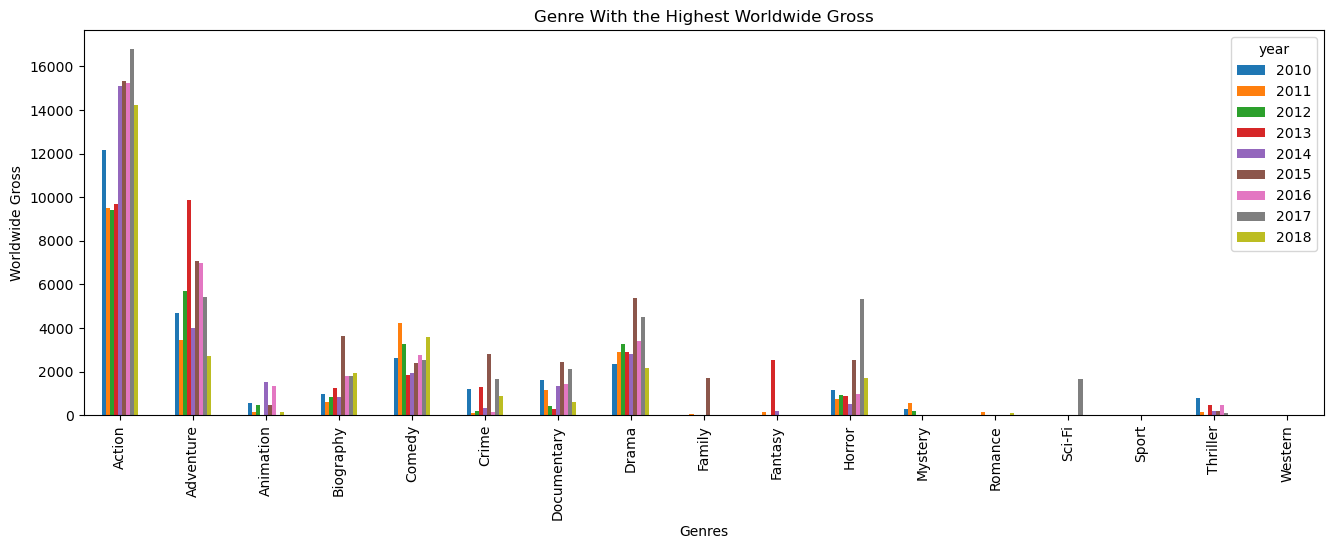

In [337]:
table2.plot(kind='bar', figsize=(16,5), xlabel='Genres', ylabel='Worldwide Gross', title='Genre With the Highest Worldwide Gross')


### Conclusion
The top  genres are action,adventure,comedy,drama.


### Profit according to release month 


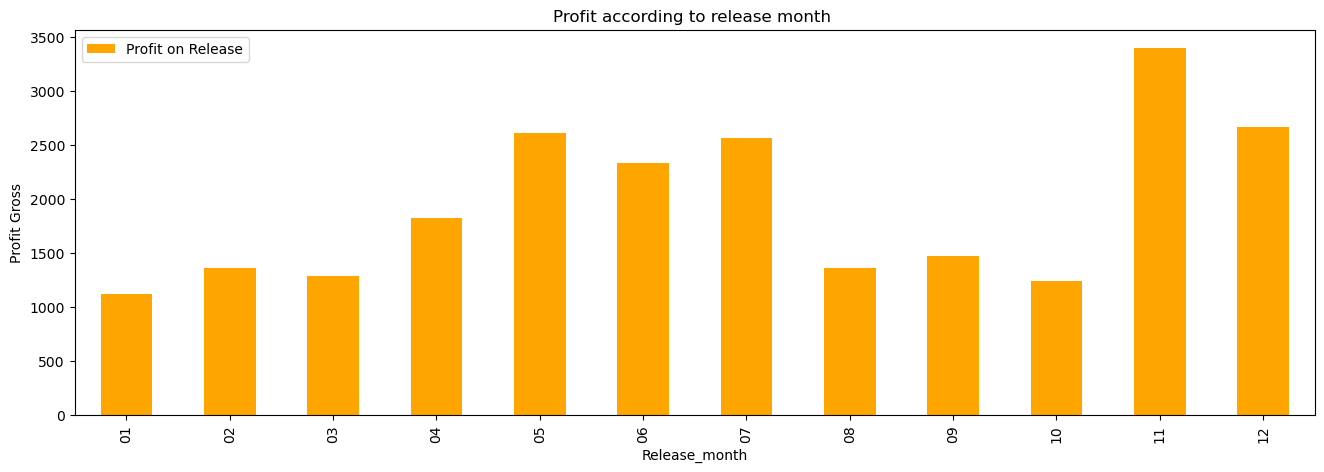

In [301]:
Release_profit = Total_movie_budget.sort_values('profit_millions', ascending=False)[:100].groupby('release_month').mean()['profit_millions']
Release_profit.plot(kind='bar', figsize=(16,5), xlabel='Release_month', ylabel='Profit Gross', title='Profit according to release month ', color='orange')


plt.legend(["Profit on Release"]);

### Conclusion
The profitable release months are,December,November,July and May,which is usually holiday time of the year.

In [373]:
#Total of each genre under each year using groupby
Total_movie_budget_yr = movie_id_budget.groupby([ 'genres1','year'])['profit_millions','domestic_gross_y_millions','worldwide_gross_millions','production_budget_millions'].sum()
Total_movie_budget_yr['ROI'] = Total_movie_budget_yr['profit_millions'] / Total_movie_budget_yr['production_budget_millions'] 
sorted_total_movie_budget_yr = Total_movie_budget_yr.sort_values(by=["year","profit_millions"], ascending=False)
sorted_total_movie_budget_yr_filtered = sorted_total_movie_budget_yr.loc[sorted_total_movie_budget_yr['profit_millions'] >1000]
sorted_total_movie_budget_yr_filtered.reset_index()

,genres1,year,profit_millions,domestic_gross_y_millions,worldwide_gross_millions,production_budget_millions,ROI
0,Action,2018,10829.622942,5730.610529,14220.622942,3391.000000,3.193637
1,Comedy,2018,2748.602782,2088.174475,3591.302782,842.700000,3.261662
2,Adventure,2018,1716.636972,1013.821384,2718.536972,1001.900000,1.713382
3,Drama,2018,1643.495369,1058.006597,2179.495369,536.000000,3.066223
4,Horror,2018,1623.424010,745.418985,1707.424010,84.000000,19.326476
5,Biography,2018,1457.354704,668.416281,1913.854704,456.500000,3.192453
6,Action,2017,12200.941387,5781.182351,16816.341387,4615.400000,2.643528
7,Horror,2017,4725.086978,2226.137585,5331.686978,606.600000,7.789461
8,Adventure,2017,3990.670149,1722.546544,5403.170149,1412.500000,2.825253
9,Drama,2017,3447.771741,2142.692031,4491.271741,1043.500000,3.304046


### Average Profit under genre 

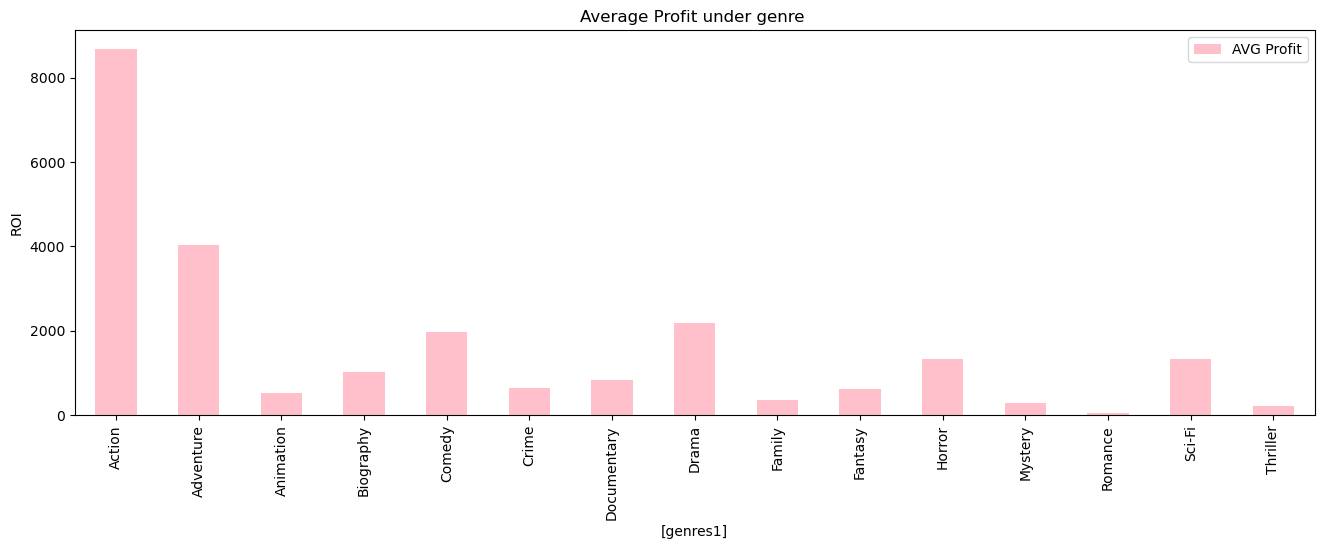

In [341]:
Genre_Profit = Total_movie_budget_yr.sort_values('profit_millions', ascending=False)[:100].groupby('genres1').mean()['profit_millions']
Genre_Profit.plot(kind='bar', figsize=(16,5), xlabel=['genres1'], ylabel='ROI', title='Average Profit under genre ', color='pink')


plt.legend(["AVG Profit"]);

### Conclusion

The action has the maximum profit under gener

### ROI Analysis

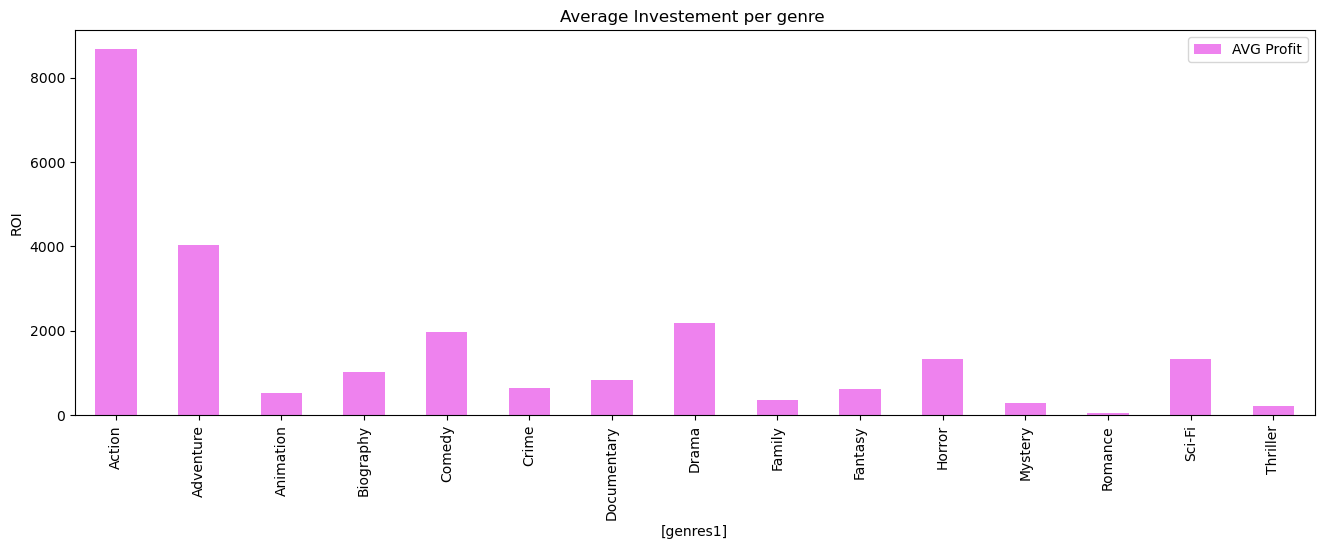

In [343]:
Genre_Investment = Total_movie_budget_yr.sort_values('production_budget_millions', ascending=False)[:100].groupby('genres1').mean()['production_budget_millions']
Genre_Profit.plot(kind='bar', figsize=(16,5), xlabel=['genres1'], ylabel='ROI', title='Average Investement per genre ', color='violet')


plt.legend(["AVG Profit"]);

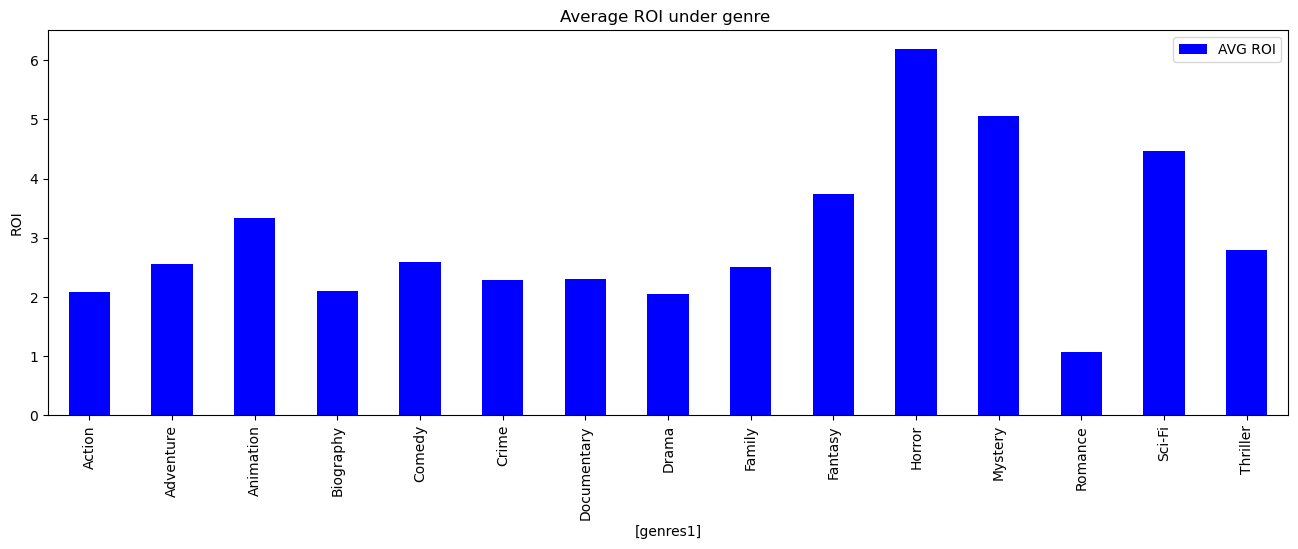

In [342]:
Genre_ROI = Total_movie_budget_yr.sort_values('ROI', ascending=False)[:100].groupby('genres1').mean()['ROI']
Genre_ROI.plot(kind='bar', figsize=(16,5), xlabel=['genres1'], ylabel='ROI', title='Average ROI under genre ', color='blue')


plt.legend(["AVG ROI"]);

### Conclusion
ROI, which is profit compared to the investment made, is for horror, mystery, sci-fi, fantasy, animation i.e., if you do not have a big budget, then it’s the above genres produce maximum profit.

In [310]:
top10_movies_2015 = movie_id_budget
movies_2015 = top10_movies_2015.loc[top10_movies_2015['year'] == 2015]
top10_movies_2015 = movies_2015.head(10)
top10_movies_2016 = movie_id_budget
movies_2016 = top10_movies_2016.loc[top10_movies_2016['year'] == 2016]
top10_movies_2016 = movies_2016.head(10)
top10_movies_2017 = movie_id_budget
movies_2017 = top10_movies_2017.loc[top10_movies_2017['year'] == 2017]
top10_movies_2017 = movies_2017.head(10)
top10_movies_2018 = movie_id_budget
movies_2018 = top10_movies_2018.loc[top10_movies_2018['year'] == 2018]
top10_movies_2018 = movies_2018.head(10)



In [320]:
top10_movies_2015_2018 = pd.concat([top10_movies_2015, top10_movies_2016,top10_movies_2017,top10_movies_2018])
top10_movies_2015_2018.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,genres,averagerating,domestic_gross_millions,...,production_budget,domestic_gross_y,worldwide_gross,profit,worldwide_gross_millions,production_budget_millions,domestic_gross_y_millions,profit_millions,month,release_month
1074,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,652.3,...,215000000.0,652270625.0,1.648855e+09,1.433855e+09,1648.854864,215.0,652.270625,1433.854864,06,06
1075,Furious 7,Uni.,353000000.0,"1,163.0",2015,tt2820852,Furious 7,"Action,Crime,Thriller",7.2,353.0,...,190000000.0,353007020.0,1.518723e+09,1.328723e+09,1518.722794,190.0,353.007020,1328.722794,04,04


In [351]:
top10_movies_2015_2018_new = top10_movies_2015_2018[['title','averagerating','worldwide_gross_millions']].copy()
top10_movies_2015_2018_new

,title,averagerating,worldwide_gross_millions
1074,Jurassic World,7.0,1648.854864
1075,Furious 7,7.2,1518.722794
1076,Avengers: Age of Ultron,7.3,1403.013963
1077,Minions,6.4,1160.336173
1078,Spectre,6.8,879.620923
1079,Spectre,6.8,879.620923
1080,Inside Out,4.6,854.235992
1081,Inside Out,4.6,854.235992
1082,Inside Out,NaN,854.235992
1083,Inside Out,NaN,854.235992


In [359]:
display(top10_movies_2015_2018_new.drop_duplicates())


,title,averagerating,worldwide_gross_millions
1074,Jurassic World,7.0,1648.854864
1075,Furious 7,7.2,1518.722794
1076,Avengers: Age of Ultron,7.3,1403.013963
1077,Minions,6.4,1160.336173
1078,Spectre,6.8,879.620923
1080,Inside Out,4.6,854.235992
1082,Inside Out,NaN,854.235992
1451,Captain America: Civil War,7.8,1140.069413
1452,Rogue One: A Star Wars Story,7.8,1049.102856
1454,Finding Dory,7.3,1021.215193


In [362]:
#top10_movies_2015_2018_avg =  movie_id_budget.groupby([ 'title','averagerating']).mean()
#rating_total_movie_budget = movie_id_budget.sort_values(by=["averagerating"], ascending=False)
#rating_total_movie_budget_filtered = rating_total_movie_budget.loc[rating_total_movie_budget['averagerating'] >8.5]
#rating_total_movie_budget_filtered.reset_index()


top_movies=top10_movies_2015_2018_new.drop_duplicates()
top_movies

,title,averagerating,worldwide_gross_millions
1074,Jurassic World,7.0,1648.854864
1075,Furious 7,7.2,1518.722794
1076,Avengers: Age of Ultron,7.3,1403.013963
1077,Minions,6.4,1160.336173
1078,Spectre,6.8,879.620923
1080,Inside Out,4.6,854.235992
1082,Inside Out,NaN,854.235992
1451,Captain America: Civil War,7.8,1140.069413
1452,Rogue One: A Star Wars Story,7.8,1049.102856
1454,Finding Dory,7.3,1021.215193


<AxesSubplot:ylabel='title'>

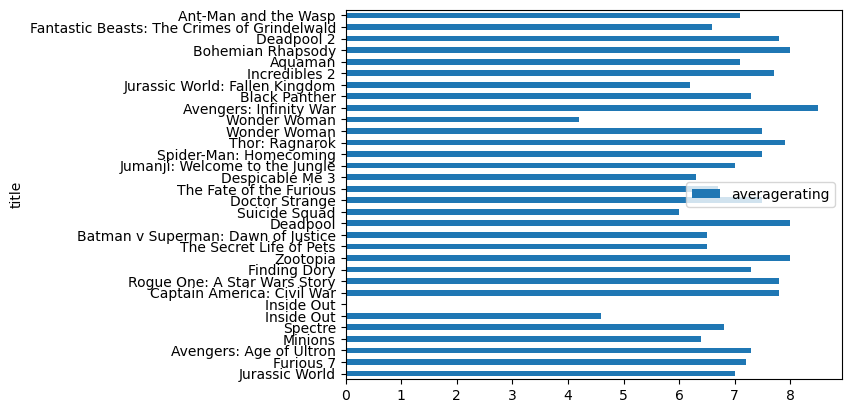

In [370]:
top_movies.plot(x="title", y="averagerating", kind="barh")


### The above graph shows the rating of the top rating movies with high profit gross in millions
The result:Avengers:Infinity war is the top rated movie

### CONCLUSION
1.If there is a high budget available, the best movies to produce are in the genres of action, adventure, drama and comedy respectively as this gives the maximum revenue and subsequently profit.

2.If there is a budget constraint, the best movies to produce movies with high ROI: are horror, mystery, sci-fi, fantasy, and animation.

3.Best studios to collaborate with are BV, Uni, Fox and WB as they produce high-gross movies.

4.Best time to release movies is during Christmas and the School holiday seasons.


## THE END